## Measuing Churn Rate

* Churn is the rate of loss of users
* Its dual is acquisiton
* WLOG can let $\Delta t=30$ days (lookback time)
* Consider a time interval $t_{now} - dt$ for which we define churn
* Then churn rate $\eta$ for the interval is count of lost users $U_{lost}$ during the lookback $\Delta t$, divided by total count of users $U_{initial}$ at the beginning of the lookback.

$U_{initial} = U_{total, t-\Delta t}$ 

where all of the lost users are contained in the set of users at $t-\Delta t$ but not in the set of users now

$\{ U_{lost}\} \subset \{ U_{initial} \} = \{U_{total, t-\Delta t} \}$ 

Let the size of the set $\{ A \} = | A | $. The churn rate  $\eta$ is given by

$ \eta = \frac{|U_{lost}|}{|U_{initial}|} = \frac{|U_{initial} - U_{now} |} { |U_{initial} |}$



For example, let $\Delta t= 30$ days and $dt = 1$ day. Then the churn rate on december 20th is given by the following routine:

1. Compute the number of users in the user pool on November 20
2. Compute the number of users whose last day of use was November 20
3. Divide them

Problems with this include but are not limited to the inability to assign a value to the number referred to in (1).  Option: use the avg month;y active users, with centroid 11/20?

The method and result of the calculation of churn depends on the method of defining the sets of users in its formulation, and there are tradeoffs.



### Lets begin by computing the DAU, WAU, MAU over all time (Feb 2022 - Dec 2022)

Fetching DAU.

SELECT
        date,
        count(distinct($user_id)) as DAU
FROM
        fpa.events
GROUP BY
        date
-- HAVING 
--      date>="2022-09-01"
ORDER BY
        date ASC

Computing EMA: COM=4 days.

Fetching MAU.
SELECT 
	month,
	count(distinct($user_id)) as MAU
FROM
        fpa.derived
GROUP BY
        month
-- HAVING 
--      date>="2022-09-01"
ORDER BY
        month ASC

Fetching WAU.
SELECT 
	week,
	count(distinct($user_id)) as WAU
FROM
        fpa.derived
GROUP BY
        week
-- HAVING 
--      date>="2022-09-01"
ORDER BY
		week ASC


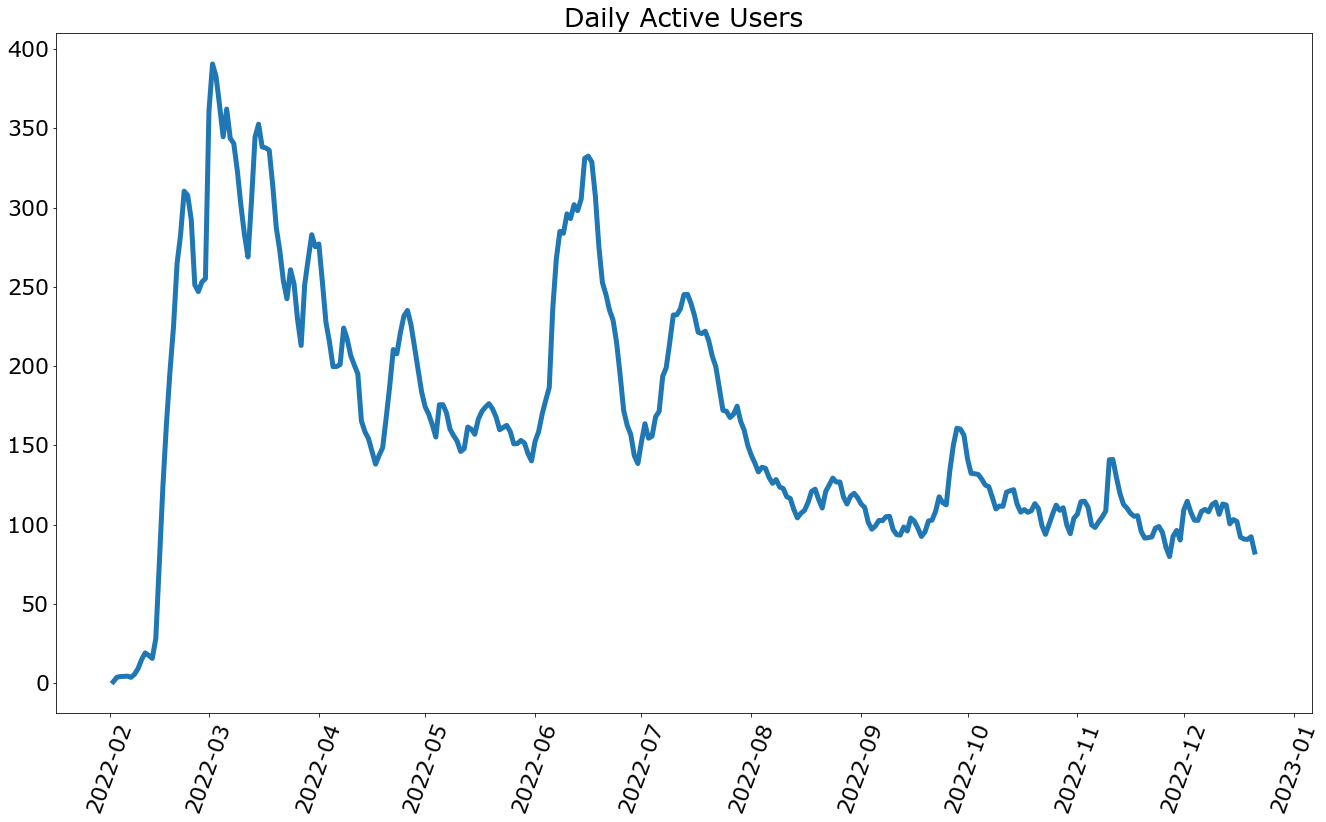

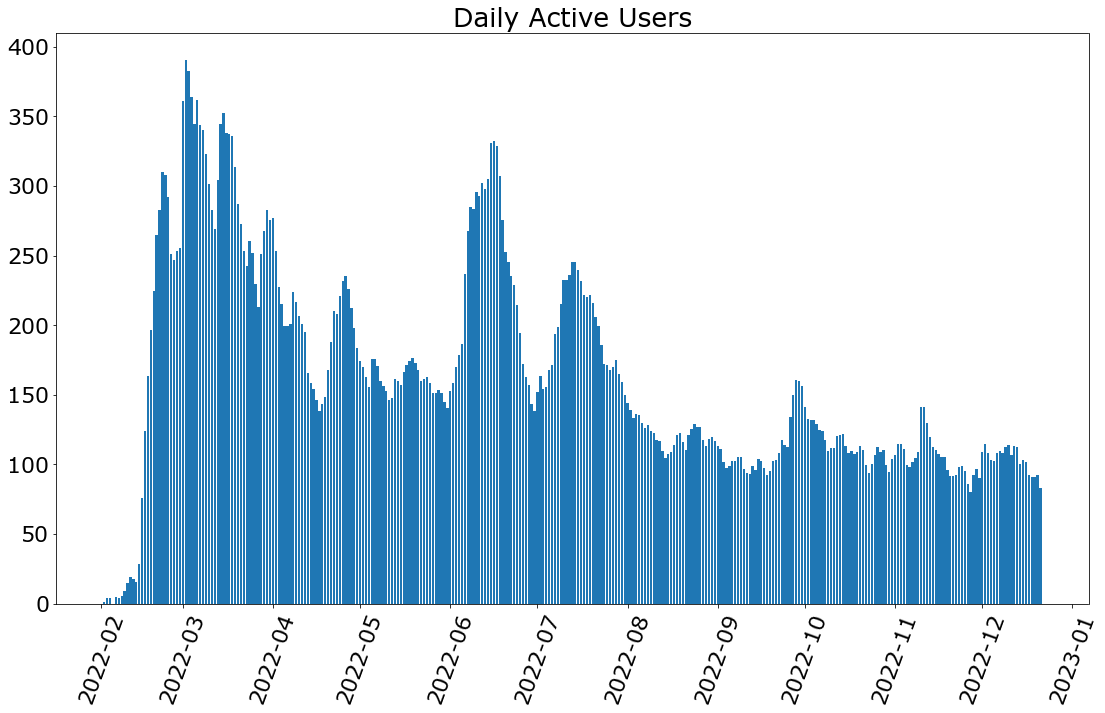

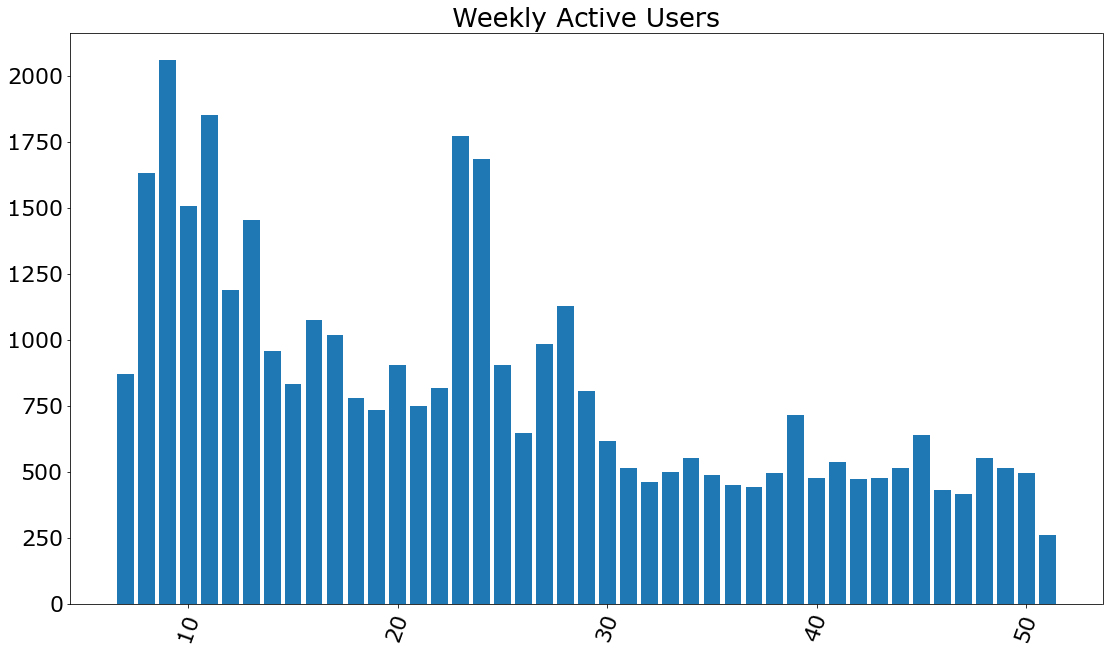

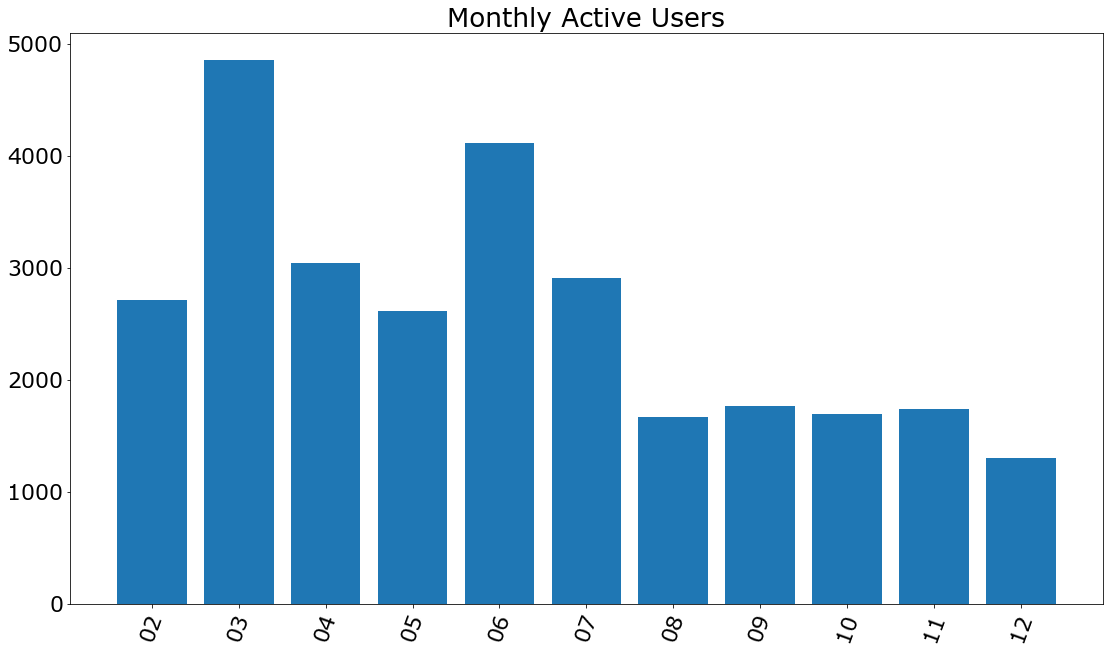

In [51]:
from secrets import secrets
from mongo import get_mongo_client, get_mongo_db_obj
from get_connections import get_alchemy_con, get_pymysql_con
import pandas as pd

conp = get_pymysql_con()
con  = get_alchemy_con()



query='''
SELECT
        date,
        count(distinct($user_id)) as DAU
FROM
        fpa.events
GROUP BY
        date
-- HAVING 
--      date>="2022-09-01"
ORDER BY
        date ASC
'''

print(f'Fetching DAU.')
print(query)
df = pd.read_sql(query, conp)
com=4
print(f'Computing EMA: COM={com} days.')
df['EMA'] = df.DAU.ewm(com=com).mean()



query = '''SELECT 
	month,
	count(distinct($user_id)) as MAU
FROM
        fpa.derived
GROUP BY
        month
-- HAVING 
--      date>="2022-09-01"
ORDER BY
        month ASC'''

print('\nFetching MAU.')
print(query)
mdd = pd.read_sql(query, conp)


query = '''SELECT 
	week,
	count(distinct($user_id)) as WAU
FROM
        fpa.derived
GROUP BY
        week
-- HAVING 
--      date>="2022-09-01"
ORDER BY
		week ASC'''

print('\nFetching WAU.')
print(query)
wdd = pd.read_sql(query, conp)





import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

font = {'family' : 'verdana',
       # 'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(22.5, 12.5)

ax.plot(df.date, df.EMA, linewidth=5)
ax.xaxis.set_major_locator(mdates.MonthLocator())

plt.xticks(rotation=70)
plt.title('Daily Active Users')

plt.show()





import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

font = {'family' : 'verdana',
       # 'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)

ax.bar(df.date, df.EMA, linewidth=5)
ax.xaxis.set_major_locator(mdates.MonthLocator())

plt.xticks(rotation=70)
plt.title('Daily Active Users')

plt.show()

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

font = {'family' : 'verdana',
       # 'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)

ax.bar(wdd.week, wdd.WAU, linewidth=5)
#ax.xaxis.set_major_locator(mdates.MonthLocator())

plt.xticks(rotation=70)
plt.title('Weekly Active Users')

plt.show()



import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

font = {'family' : 'verdana',
       # 'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)

ax.bar(mdd.month, mdd.MAU, linewidth=5)
# ax.xaxis.set_major_locator(mdates.MonthLocator())

plt.xticks(rotation=70)
plt.title('Monthly Active Users')

plt.show()




In [9]:
df

,date,DAU,EMA
0,2022-02-02,1,1.000000
1,2022-02-03,6,3.777778
2,2022-02-04,5,4.278689
3,2022-02-06,5,4.523035
4,2022-02-07,2,3.772489
...,...,...,...
317,2022-12-17,53,92.189015
318,2022-12-18,86,90.951212
319,2022-12-19,90,90.760969
320,2022-12-20,99,92.408775


In [10]:
wdd

,week,WAU
0,7,871
1,8,1631
2,9,2061
3,10,1506
4,11,1851
5,12,1191
6,13,1453
7,14,957
8,15,831
9,16,1075


In [11]:
mdd

,month,MAU
0,02,2715
1,03,4858
2,04,3041
3,05,2619
4,06,4113
5,07,2912
6,08,1669
7,09,1767
8,10,1693
9,11,1736


In [12]:
# for churn need the N_users_lost(month), and the N_users_existing(month)=MAU(month)

In [14]:
N_lost = dict() # keys as month: 02, 03, 04 ... , vals as int.  This is N(users who dont appear in month, but do in month-1) 

In [15]:
# so we need to find the N_users_lost(month) = | { user in month -1, not in month} |

In [86]:


# for churn need the N_users_lost(month), and the N_users_existing(month)=MAU(month)
# so we need to find the N_users_lost(month) = | { user in month -1, not in month} |


def get_next_month(month, diff=+1):
    if diff not in [-1, +1]:
        raise ValueError('diff must be +1, or -1')
        
    months = list(mdd.month.values)
    if diff == -1:
        months = list(reversed(months))
    
    if month == '02' and diff == -1:
        raise IndexError('Cant find a month smaller than 02')
    elif month == '12' and diff == +1:
        raise IndexError('Cant find a month larger than 12')
        
    i = months.index(month)
    return months[i+1]


def test_month_inc_func():
    MON = '04'
    print(f'''The month one greater than "{MON}" is "{get_next_month(MON, diff=+1)}"''')
    MON='07'
    print(f'''The month one less than "{MON}" is "{get_next_month(MON, diff=-1)}"''')


def get_users_of_month(month, con=conp):
    '''
    Return the set of user_id's in a given month (Jan == '01' ... Dec == '12').
    '''
    
    query = f"""SELECT 
    distinct($user_id) 
    FROM 
    fpa.derived 
    WHERE month='{month}';"""
  #  --AND anon_user <> 1;"""
    
    df = pd.read_sql(query, con)
    return set(df['$user_id'])


def get_users_lost(month):
    '''
    Return the set of users who arent present this month but were around last month
    '''
    
    if int(month)==2:
        raise ValueError('Cant compute users lost for month = min(month) = \'02\'')
    
    #month_minus_one_set = get_users_of_month(month-1)
    month_minus_one_set = get_users_of_month(get_next_month(month, diff=-1))
    month_set = get_users_of_month(month)
    
    set_of_lost_users = { u for u in month_minus_one_set if u not in month_set } # could use set difference?
    
    return set_of_lost_users


def get_users_gained(month):
    
    if int(month)==2:
        raise ValueError('Cant compute users lost for month = min(month) = \'02\'')
    
    month_minus_one_set = get_users_of_month(get_next_month(month, diff=-1))
    month_set = get_users_of_month(month)
    
    set_of_gained_users = { u for u in month_set if u not in month_minus_one_set }
    
    return set_of_gained_users
  
    
def get_churn(month):
    
    return len(get_users_lost(month))/len(get_users_of_month(get_next_month(month, diff=-1)))


def get_acquisition(month):
    
    return len(get_users_gained(month))/len(get_users_of_month(get_next_month(month, diff=-1)))


conp = get_pymysql_con()


def main():

    test_month_inc_func()

    print('Let us calculate some churns, shall we?')

    conp = get_pymysql_con()

    raw_churns = dict()
    raw_acquisitions = dict()

    for month in mdd.month.iloc[1:].values:
        
        CHURN = get_churn(month)
        print('Churn for month', month, 'is', CHURN)
        raw_churns[month] = CHURN
        
        ACQ = get_acquisition(month)
        print('Acquisitions for month', month, 'is', ACQ)
        raw_acquisitions[month] = ACQ

        
main()



The month one greater than "04" is "05"
The month one less than "07" is "06"
Let us calculate some churns, shall we?
Churn for month 03 is 0.4900589101620029
Acquisitions for month 03 is 1.2790868924889542
Churn for month 04 is 0.7744391850174933
Acquisitions for month 04 is 0.4004939287919325
Churn for month 05 is 0.7498356344510191
Acquisitions for month 05 is 0.6111111111111112
Churn for month 06 is 0.7446564885496183
Acquisitions for month 06 is 1.3148854961832062
Churn for month 07 is 0.8468643655809431
Acquisitions for month 07 is 0.5549343704423918
Churn for month 08 is 0.8448335049776863
Acquisitions for month 08 is 0.4181256436663234
Churn for month 09 is 0.7892215568862275
Acquisitions for month 09 is 0.8479041916167664
Churn for month 10 is 0.8054298642533937
Acquisitions for month 10 is 0.7635746606334841
Churn for month 11 is 0.8453364817001181
Acquisitions for month 11 is 0.8707201889020071
Churn for month 12 is 0.8762233736327001
Acquisitions for month 12 is 0.6246401842

In [87]:
def get_users_of_month(month, con=conp):
    '''
    Return the set of user_id's in a given month (Jan == '01' ... Dec == '12').
    '''
    
    query = f"""SELECT 
    distinct($user_id) 
    FROM 
    fpa.derived 
    WHERE month='{month}';"""
  #  --AND anon_user <> 1;"""
    
    df = pd.read_sql(query, con)
    return set(df['$user_id'])

In [89]:
con = get_pymysql_con()

query = """
SELECT
    distinct($user_id),
    MONTH(date) month
from fpa.events"""

df = pd.read_sql(query, con)

In [90]:
df

,$user_id,month
0,None,2
1,60d2d9a220ba361847a6f2ed,2
2,61fb8f2c5ebf556b1f3217cf,2
3,5df1201474236794fbe087bb,2
4,61fc571f5ebf55484c33a8f9,2
...,...,...
28663,63a35028129b46e38501f437,12
28664,63a2ca7f129b46f28400424c,12
28665,63a2f6dfbe7cd3b2c57037b4,12
28666,63a353cabe7cd36d94716d0f,12


### Weaknesses

* Taking N_users(month) to be the set of unique `$user_id` present in the month doesn't consider whether that user_id did any more than login once, and leave. In other words, the nature of the activity of the users in this calculation is not considered.

* There is nothing special about the 30 or 31 day windows known by the Gregorian Calendar (thats what its called, right?) --> we are sampling a continuous function of time ... approx 12x/year

## Considerations for Future Work

* We should verify common sense identies, such as 

`MAU(month=11) = MAU(month=10) + chrun(month=10) + acquired(month=10) ... (off by one errors)?`

In [78]:
from mongo import get_mongo_db_obj

db = get_mongo_db_obj()



def calc_total_reg_nov():
    
    reg = len(list(db.users.find({'created': {'$gt': datetime.datetime(2022,11,1), '$lte':datetime.datetime(2022,11,30)}, 'anonymous': False, 'createdThroughConnectWallet': False, 'appleId': None})))

    wallet_con = len(list(db.users.find({'created': {'$gt': datetime.datetime(2022,11,1), '$lte': datetime.datetime(2022,11,30)}, 'createdThroughConnectWallet': True })))

    apple = len(list(db.users.find({'created': {'$gt': datetime.datetime(2022,11,1), '$lte': datetime.datetime(2022,11,30)}, 'appleId': {'$ne': None}})))
    
    return reg+wallet_con+apple

In [79]:
calc_total_reg_nov()

714

In [59]:
import datetime

db = get_mongo_db_obj()

len(list(db.users.find({'created': {'$gt': datetime.datetime(2022,11,1), '$lte':datetime.datetime(2022,11,30)}, 'anonymous': False, 'createdThroughConnectWallet': False, 'appleId': None})))

572

In [63]:
months = mdd.month.values

In [64]:
months

array(['02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'],
      dtype=object)

In [77]:


len(get_users_gained('11'))



1475